# Imports

In [ ]:
# Importa a biblioteca NumPy para cálculos numéricos e manipulação de arrays
import numpy as np
# Importa a biblioteca matplotlib para geração de gráficos
import matplotlib.pyplot as plt

# Formatações

In [ ]:
# Define o estilo do gráfico como fundo escuro
plt.style.use('dark_background')

# Define o tamanho padrão das figuras (largura, altura)
plt.rcParams['figure.figsize'] = (10, 8)

# Cria o Data set

In [ ]:
# Função que gera uma curva linear com possível ruído
# Fórmula base: y = w*x + b + ruído
def get_linear_curve(x, w, b=0, noise_scale=0):
    return w * x + b + noise_scale * np.random.randn(x.shape[0])

In [17]:
x = np.arange(-10, 30.2, 0.5)# Cria um array de valores de -10 até 30 com passo 0.5
# Gera os valores Y baseados na função linear
# w = 1.8 (inclinação)
# b = 32 (intercepto)
# noise_scale = 2.5 adiciona variação aleatória
Y = get_linear_curve(x, 1.8, 32, noise_scale=2.5)

In [ ]:
# Mostra o formato (shape) dos arrays (quantidade de elementos)
x.shape, Y.shape

((81,), (81,))

Text(0, 0.5, '°F')

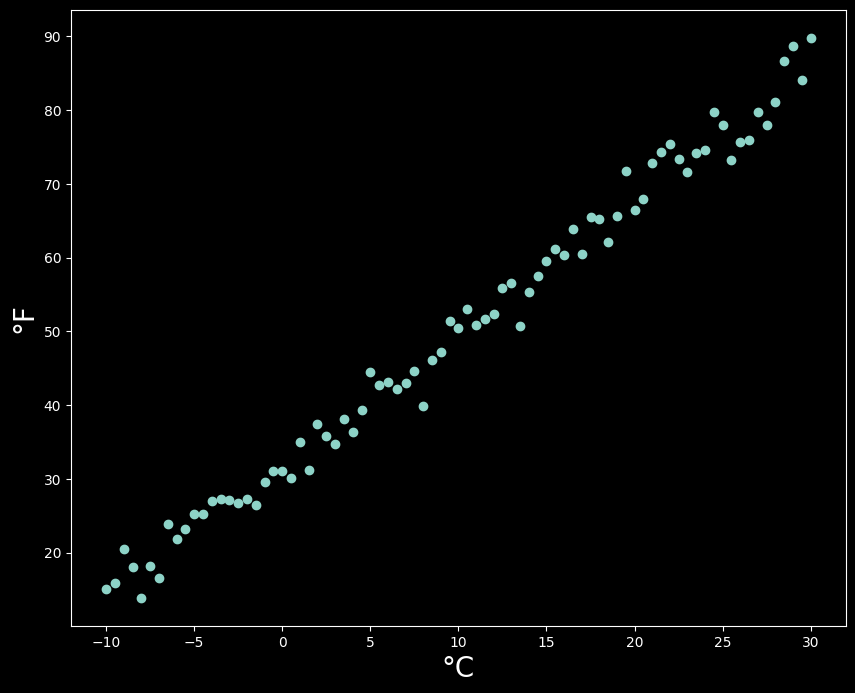

In [19]:
plt.scatter(x, Y)# Plota os pontos no gráfico (dispersão)
plt.xlabel('°C', fontsize=20)# Define o rótulo do eixo X
plt.ylabel('°F', fontsize=20)# Define o rótulo do eixo Y

# Modelo

- Inicializar os pesos e bias
- Feedforward
- Calcular a perda
- Backpropagation

In [21]:
# Inicializa o peso (w) com valor aleatório entre 0 e 1
w = np.random.rand(1)
# Inicializa o bias (b) com 0
b = 0

In [22]:
# Função forward (propagação direta)
# Calcula a saída do modelo linear: y = w*x + b
def forward(inputs, w, b):
    return w * inputs + b

In [23]:
# Função de erro quadrático (MSE individual)
# Retorna o erro ao quadrado para cada ponto
def mse(Y, y):
    return(Y-y)**2

In [29]:
# Função de backpropagation
# Atualiza w e b usando Gradiente Descendente
def backpropagation(inputs, outputs, targets, w, b,lr):
    # Derivada parcial da função de erro em relação a w
    # Fórmula matemática do gradiente aplicada ao MSE
    dw = lr*(-2*inputs*(targets-outputs)).mean()
    # Derivada parcial da função de erro em relação a b
    db = lr*(-2*(targets-outputs)).mean()
    # Atualização dos parâmetros (descendo na direção oposta ao gradiente)
    w -= dw
    b -= db
    return w, b

In [30]:
# Função de treino do modelo
def model_fit(inputs, target, w, b, epochs= 200, lr = 0.001):
    # Loop de treinamento (épocas = número de iterações)
    for epoch in range(epochs):
        # Forward pass (calcula previsão)
        outputs = forward(inputs, w, b)
        # Calcula o erro médio
        loss = np.mean(mse(target, outputs))
        # Atualiza os parâmetros usando backpropagation
        w, b = backpropagation(inputs, outputs, target, w, b, lr)
        # Exibe o erro a cada 10% do total de épocas
        if(epoch+1)%(epochs/10)==0:
            print(f'Epoch: [{(epoch+1)}/{epochs}] Loss: [{loss:.4f}]')
    return w, b

# Conjunto de dados

In [31]:
# Cria novos dados com passo maior
x = np.arange(-10,30,2)
# Gera dados perfeitos (sem ruído) para treinar
Y = get_linear_curve(x, w = 1.8, b=32)

# Reinicialização do modelo

In [32]:
# Inicializa w com distribuição normal (melhor prática que rand)
w = np.random.randn(1)
# Inicializa b como vetor zero
b = np.zeros(1)


In [35]:
# Treina o modelo por 2000 épocas
w, b = model_fit(x, Y, w, b, epochs=2000, lr = 0.002)

# Mostra os valores finais aprendidos
print(f'W: {w[0]:.3f}, b: {b[0]:.3f}')

Epoch: [200/2000] Loss: [0.0000]
Epoch: [400/2000] Loss: [0.0000]
Epoch: [600/2000] Loss: [0.0000]
Epoch: [800/2000] Loss: [0.0000]
Epoch: [1000/2000] Loss: [0.0000]
Epoch: [1200/2000] Loss: [0.0000]
Epoch: [1400/2000] Loss: [0.0000]
Epoch: [1600/2000] Loss: [0.0000]
Epoch: [1800/2000] Loss: [0.0000]
Epoch: [2000/2000] Loss: [0.0000]
W: 1.800, b: 32.000


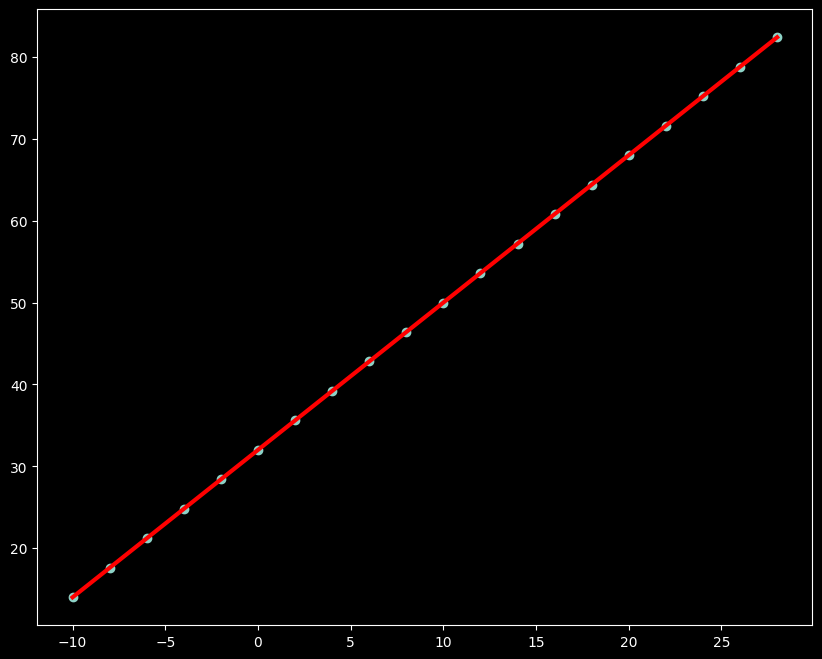

In [36]:
plt.scatter(x, Y)
plt.plot(x, get_linear_curve(x, w, b), 'r', lw=3)